# Exemple 2 : la fonction XOR

## 1. Importation des librairies

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# On fixe la seed aléatoire pour la reproductibilité
seed = 1
torch.manual_seed(seed)
np.random.seed(seed)

## 2. Définition des données d'apprentissage

In [2]:
# Définition des données d'apprentissage
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

## 3. Architecture du réseau 

Pour vous aider : https://lightning.ai/docs/pytorch/stable/

In [3]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# création d'une instance
xor_model = XORModel()

## 4. Apprentissage du réseau

In [4]:
# Choix de l'optimiseur
optimizer = optim.SGD(xor_model.parameters(), lr=0.05, momentum=0.99)

# Fonction de perte
criterion = nn.MSELoss()
losses = []
# Apprentissage du modèle
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = xor_model(X)
    loss = criterion(outputs, Y.view(-1, 1))
    losses.append(loss.item())
    # calcule des gradients de la fonction de coût par rapport aux paramètres du modèle
    loss.backward()
    # applique les mises à jour des poids en fonction des gradients calculés.
    optimizer.step()

## 5. Visualisation des résultats

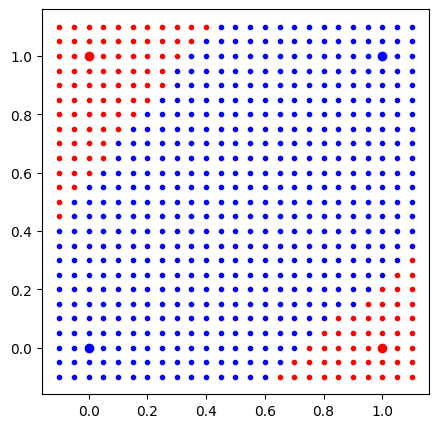

In [5]:
# Visualisation des résultats
def plot_decision_boundary(model):
    # cycle over 2D grid
    plt.figure(figsize=(5, 5))
    for i in np.arange(-0.1, 1.1, 0.05):
        for j in np.arange(-0.1, 1.1, 0.05):
            # eval model on each grid point
            input_data = torch.tensor([[i, j]], dtype=torch.float32)
            output = model(input_data)
            if output > 0.5:
                plt.plot(i, j, ".r")
            else:
                plt.plot(i, j, ".b")

    for i in range(Y.size(0)):
        if Y[i] == 1:
            plt.plot(X[i, 0], X[i, 1], "ro")
        else:
            plt.plot(X[i, 0], X[i, 1], "bo")
    plt.show()

plot_decision_boundary(xor_model)

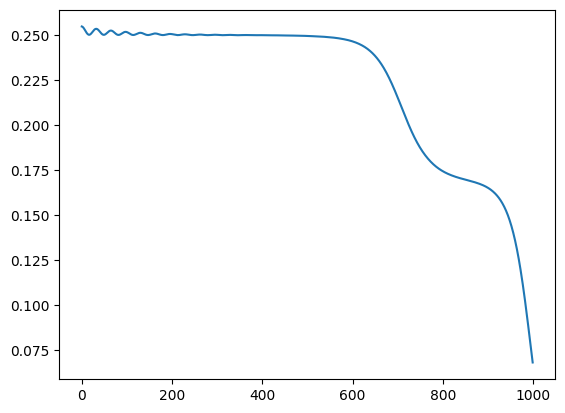

In [6]:
plt.plot(losses)